In [1]:
import logging
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Log your steps using the logger library in python. 


In [2]:
# Set up basic configuration for logging
logging.basicConfig(filename='data_analysis.log', level=logging.INFO, format='%(asctime)s:%(levelname)s:%(message)s')


In [3]:
# Create or get a logger
logger = logging.getLogger()

logger = logging.getLogger('data_analysis.logger')  # 'data_analysis.logger' is a custom name for your logger


In [4]:
logger.setLevel(logging.DEBUG)  # Set the minimum logging level

In [5]:
# Create a file handler for outputting log messages to a file
file_handler = logging.FileHandler('data_analysis.log')
file_handler.setLevel(logging.INFO)  # Set the logging level for the file handler

In [6]:
# creating a formatter
file_formatter = logging.Formatter('%(asctime)s - %(name)s - %(levelname)s - %(message)s')
file_handler.setFormatter(file_formatter)

In [7]:
# Create a console handler for outputting log messages to the console
console_handler = logging.StreamHandler()
console_handler.setLevel(logging.DEBUG)  # Set the logging level for the console handler

In [8]:
# set a formatter for the console handler
console_formatter = logging.Formatter('%(asctime)s - %(levelname)s - %(message)s')
console_handler.setFormatter(console_formatter)

In [9]:
# Attaching the handlers to the logger
logger.addHandler(file_handler)
logger.addHandler(console_handler)

In [10]:
def my_function():
    logger.info('Starting my_function...')

    try:
        # Your code logic here
        # This example simply divides 10 by 2
        result = 10 / 2
        logger.info('Result: %s', result)
    except Exception as e:
        # Log the exception if it occurs
        logger.error('An error occurred: %s', str(e))
    finally:
        # Log that the function has finished executing
        logger.info('Finished my_function.')

# Call the function
if __name__ == "__main__":
    # Your main code here
    logger.info('Program started.')
    my_function()
    logger.info('Program finished.')


2024-04-02 22:25:40,434 - INFO - Program started.
2024-04-02 22:25:40,444 - INFO - Starting my_function...
2024-04-02 22:25:40,446 - INFO - Result: 5.0
2024-04-02 22:25:40,446 - INFO - Finished my_function.
2024-04-02 22:25:40,446 - INFO - Program finished.


In [11]:
# Load the merged datasets
logger.info('Loading the merged train and test datasets.')
train_store_merged_df = pd.read_csv('train_store_merged_dataset.csv')
test_store_merged_df = pd.read_csv('test_store_merged_dataset.csv')

2024-04-02 22:25:40,469 - INFO - Loading the merged train and test datasets.
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\3356341812.py:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  train_store_merged_df = pd.read_csv('train_store_merged_dataset.csv')
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\3356341812.py:4: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  test_store_merged_df = pd.read_csv('test_store_merged_dataset.csv')


In [12]:
# Preliminary data inspection
train_store_merged_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,NaN
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NaN


In [13]:
test_store_merged_df.head()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,1,4,2015-09-17,1.0,1,0,0,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
1,2,3,4,2015-09-17,1.0,1,0,0,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
2,3,7,4,2015-09-17,1.0,1,0,0,a,c,24000.0,4.0,2013.0,0,0.0,0.0,NaN
3,4,8,4,2015-09-17,1.0,1,0,0,a,a,7520.0,10.0,2014.0,0,0.0,0.0,NaN
4,5,9,4,2015-09-17,1.0,1,0,0,a,c,2030.0,8.0,2000.0,0,0.0,0.0,NaN


In [14]:
# Data Inspection
logger.info('Inspecting the data for initial analysis.')
logger.info(f'Train dataset shape: {train_store_merged_df.shape}')
logger.info(f'Test dataset shape: {test_store_merged_df.shape}')

2024-04-02 22:25:42,993 - INFO - Inspecting the data for initial analysis.
2024-04-02 22:25:42,993 - INFO - Train dataset shape: (1017209, 18)
2024-04-02 22:25:43,001 - INFO - Test dataset shape: (41088, 17)


#  Handling Missing Values

In [15]:
logger.info("Starting data cleaning...")

2024-04-02 22:25:43,018 - INFO - Starting data cleaning...


In [16]:
# Fill missing numerical values with median
for column in ['CompetitionDistance', 'CompetitionOpenSinceMonth', 'CompetitionOpenSinceYear', 'Promo2SinceWeek', 'Promo2SinceYear']:
    train_store_merged_df[column].fillna(train_store_merged_df[column].median(), inplace=True)
    test_store_merged_df[column].fillna(test_store_merged_df[column].median(), inplace=True)


C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2294345643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store_merged_df[column].fillna(train_store_merged_df[column].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2294345643.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2294345643.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store_merged_df[column].fillna(train_store_merged_df[column].median(), inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2294345643.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting v

In [17]:
# For categorical data, we might decide to fill missing values with 'None' or the most common value
# Here, PromoInterval is filled with 'None' to indicate no promo interval
train_store_merged_df['PromoInterval'].fillna('None', inplace=True)
test_store_merged_df['PromoInterval'].fillna('None', inplace=True)

C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2818501498.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_store_merged_df['PromoInterval'].fillna('None', inplace=True)
C:\Users\admin\AppData\Local\Temp\ipykernel_8684\2818501498.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as

In [18]:
# For the 'Open' column in the test set, assume if missing that the store is open
test_store_merged_df['Open'].fillna(1, inplace=True)  # Assuming stores are open if this is missing


C:\Users\admin\AppData\Local\Temp\ipykernel_8684\578604138.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  test_store_merged_df['Open'].fillna(1, inplace=True)  # Assuming stores are open if this is missing


In [19]:
logger.info("Handled missing values.")

2024-04-02 22:25:43,559 - INFO - Handled missing values.


# Handling Outliers

In [20]:
def handle_outliers(train_merged_df, column):
    Q1 = train_merged_df[column].quantile(0.25)
    Q3 = train_merged_df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    train_merged_df[column] = train_merged_df[column].clip(lower=lower_bound, upper=upper_bound)

train_store_merged_df[column]

0             0.0
1          2010.0
2          2011.0
3             0.0
4             0.0
            ...  
1017204    2013.0
1017205       0.0
1017206       0.0
1017207       0.0
1017208    2012.0
Name: Promo2SinceYear, Length: 1017209, dtype: float64

In [21]:
# Apply to CompetitionDistance as an example
handle_outliers(train_store_merged_df, 'CompetitionDistance')
handle_outliers(test_store_merged_df, 'CompetitionDistance')

logger.info("Handled outliers.")


2024-04-02 22:25:43,725 - INFO - Handled outliers.


# Finalizing Data Cleaning

In [22]:
train_store_merged_df.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,4.647324e+03,4.926878e+00,1.370173e+03,5.005638e-01,1.164767e+01,1.007011e+03
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,5.194916e+03,4.283543e+00,9.353634e+02,4.999999e-01,1.532393e+01,1.005877e+03
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,7.100000e+02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.325000e+03,4.000000e+00,2.006000e+03,1.000000e+00,1.000000e+00,2.009000e+03
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,6.880000e+03,9.000000e+00,2.011000e+03,1.000000e+00,2.200000e+01,2.012000e+03
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,1.613500e+04,1.200000e+01,2.015000e+03,1.000000e+00,5.000000e+01,2.015000e+03


In [23]:
test_store_merged_df.describe()


,Id,Store,DayOfWeek,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000,41088.000000
mean,20544.500000,555.899533,3.979167,0.854361,0.395833,0.443487,4364.103388,4.429907,1264.787383,0.580607,14.182243,1168.078271
std,11861.228267,320.274496,2.015481,0.352748,0.489035,0.496802,4695.125285,4.214484,969.984740,0.493466,16.177932,992.765386
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10272.750000,279.750000,2.000000,1.000000,0.000000,0.000000,720.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,20544.500000,553.500000,4.000000,1.000000,0.000000,0.000000,2410.000000,4.000000,2005.000000,1.000000,9.000000,2010.000000
75%,30816.250000,832.250000,6.000000,1.000000,1.000000,1.000000,6435.000000,9.000000,2011.000000,1.000000,31.000000,2012.000000
max,41088.000000,1115.000000,7.000000,1.000000,1.000000,1.000000,15007.500000,12.000000,2015.000000,1.000000,49.000000,2015.000000


In [24]:
train_store_merged_df.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [25]:
test_store_merged_df.isnull().sum()

Id                           0
Store                        0
DayOfWeek                    0
Date                         0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

In [26]:
logger.info("Data cleaning completed successfully.")

2024-04-02 22:25:45,018 - INFO - Data cleaning completed successfully.


# Visualizing Data Distributions

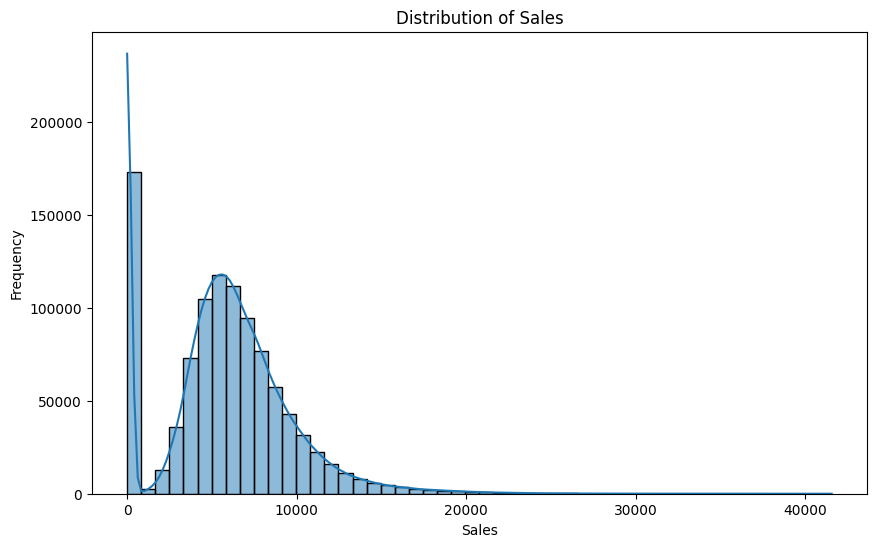

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns

# Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_store_merged_df['Sales'], bins=50, kde=True)
plt.title('Distribution of Sales')
plt.xlabel('Sales')
plt.ylabel('Frequency')
plt.show()

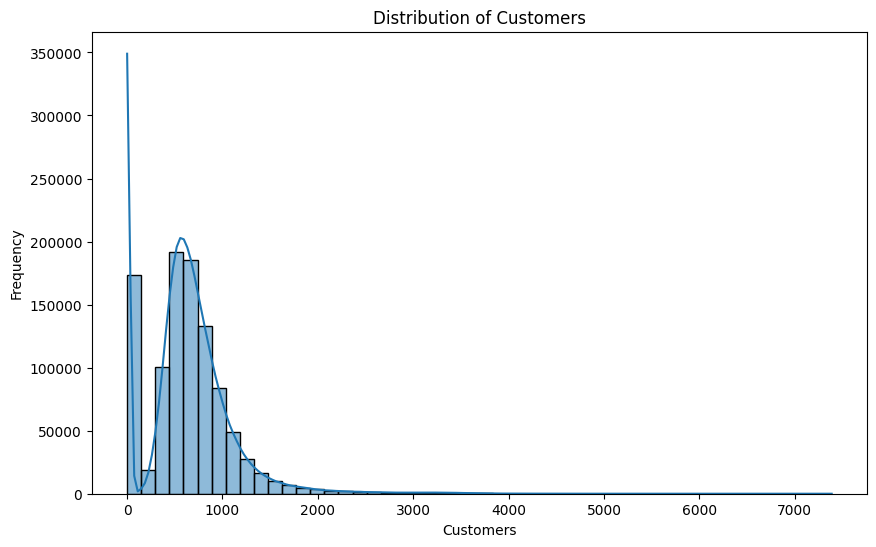

In [28]:
# Customer distribution
plt.figure(figsize=(10, 6))
sns.histplot(train_store_merged_df['Customers'], bins=50, kde=True)
plt.title('Distribution of Customers')
plt.xlabel('Customers')
plt.ylabel('Frequency')
plt.show()

# Impact of Promotions

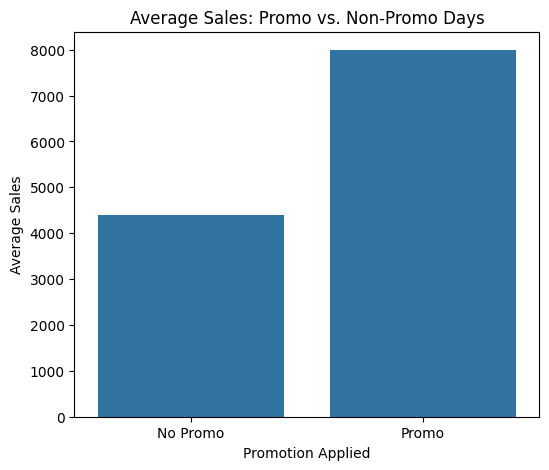

2024-04-02 22:25:59,389 - INFO - Analyzed promo distribution 


In [29]:
# Average sales on promo days vs. non-promo days
promo_sales = train_store_merged_df.groupby('Promo')['Sales'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales: Promo vs. Non-Promo Days')
plt.xlabel('Promotion Applied')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()
logger.info("Analyzed promo distribution ")

# Seasonal Purchase Behaviors

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

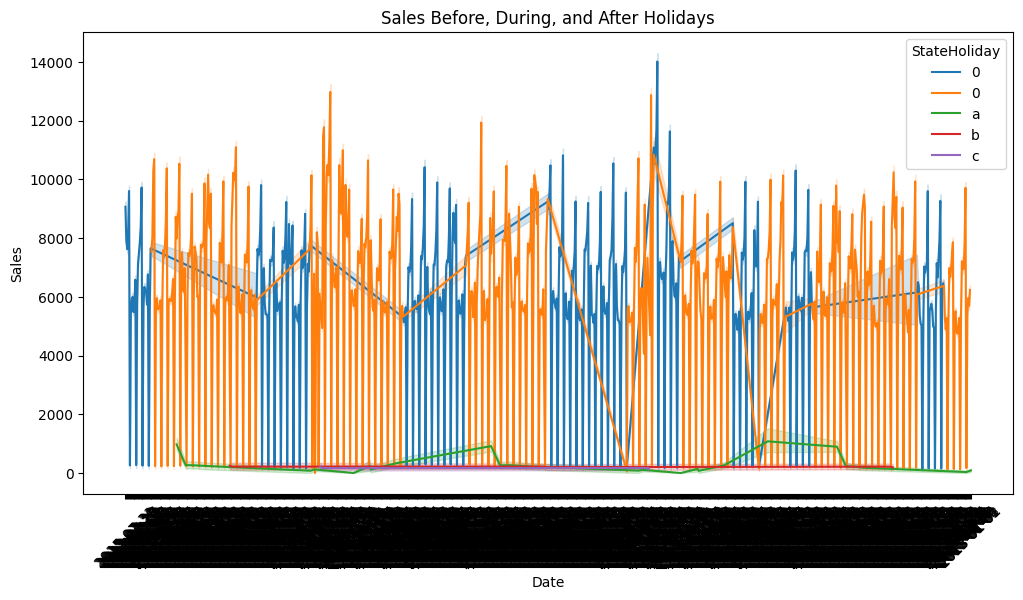

In [30]:
# Assuming you have a column 'Holiday' that indicates if the day is a holiday
# This is a placeholder; adjust according to your dataset structure
plt.figure(figsize=(12, 6))
sns.lineplot(x='Date', y='Sales', hue='StateHoliday', data=train_store_merged_df)
plt.title('Sales Before, During, and After Holidays')
plt.xticks(rotation=45)
plt.show()


In [31]:
logger.info("Analyzed sales behavior around holidays.")

2024-04-02 22:26:42,646 - INFO - Analyzed sales behavior around holidays.


# Correlation Analysis

In [32]:
import numpy as np

# Exclude non-numeric columns
numeric_cols = train_store_merged_df.select_dtypes(include=[np.number]).columns
numeric_cols

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'SchoolHoliday', 'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear'],
      dtype='object')

In [33]:
# Calculate the correlation matrix only for numeric columns
corr_matrix = train_store_merged_df[numeric_cols].corr()
corr_matrix

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
Store,1.000000,-0.000008,0.005126,0.024325,-0.000047,0.000058,0.000641,-0.026714,-0.032893,-0.008794,0.008488,0.011053,0.008520
DayOfWeek,-0.000008,1.000000,-0.462125,-0.386445,-0.528963,-0.392925,-0.205388,-0.000014,0.000008,0.000007,0.000168,0.000208,0.000168
Sales,0.005126,-0.462125,1.000000,0.894711,0.678472,0.452345,0.085124,-0.025281,-0.012431,0.002749,-0.091040,-0.044143,-0.091056
Customers,0.024325,-0.386445,0.894711,1.000000,0.616768,0.316169,0.071568,-0.141215,-0.015188,0.000489,-0.150159,-0.098323,-0.150138
Open,-0.000047,-0.528963,0.678472,0.616768,1.000000,0.295042,0.086171,0.001830,-0.000200,-0.001144,-0.008309,-0.007436,-0.008308
Promo,0.000058,-0.392925,0.452345,0.316169,0.295042,1.000000,0.067483,0.000076,-0.000039,-0.000034,-0.000983,-0.001210,-0.000983
SchoolHoliday,0.000641,-0.205388,0.085124,0.071568,0.086171,0.067483,1.000000,-0.003466,-0.001688,-0.001801,-0.006909,-0.006679,-0.006912
CompetitionDistance,-0.026714,-0.000014,-0.025281,-0.141215,0.001830,0.000076,-0.003466,1.000000,-0.037154,-0.025634,-0.095801,-0.097325,-0.095887
CompetitionOpenSinceMonth,-0.032893,0.000008,-0.012431,-0.015188,-0.000200,-0.000039,-0.001688,-0.037154,1.000000,0.784968,-0.081027,-0.108546,-0.080952
CompetitionOpenSinceYear,-0.008794,0.000007,0.002749,0.000489,-0.001144,-0.000034,-0.001801,-0.025634,0.784968,1.000000,-0.097433,-0.124378,-0.097363


In [34]:
logger.info("Calculating correlation matrix...")
# Your correlation calculation code here
logger.info("Correlation matrix calculated.")


2024-04-02 22:26:43,644 - INFO - Calculating correlation matrix...
2024-04-02 22:26:43,650 - INFO - Correlation matrix calculated.


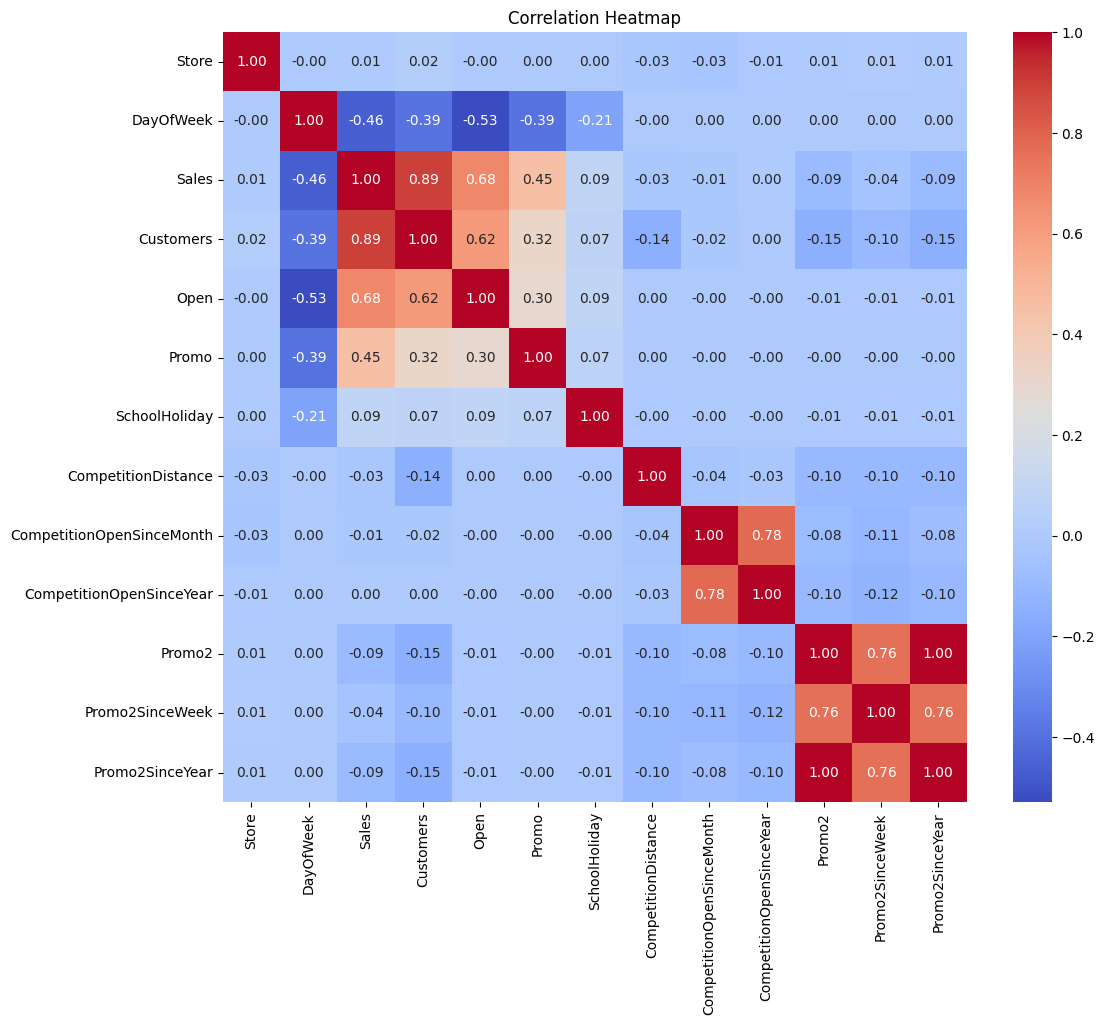

In [35]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


#  Effectiveness of Promotions on Sales

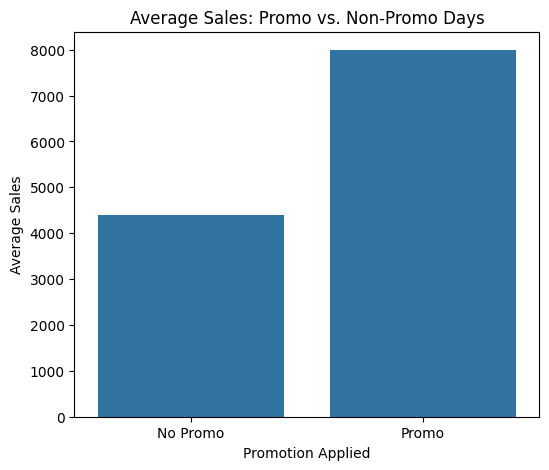

In [36]:
# Average sales on promo days vs. non-promo days
promo_sales = train_store_merged_df.groupby('Promo')['Sales'].mean().reset_index()

plt.figure(figsize=(6, 5))
sns.barplot(x='Promo', y='Sales', data=promo_sales)
plt.title('Average Sales: Promo vs. Non-Promo Days')
plt.xlabel('Promotion Applied')
plt.ylabel('Average Sales')
plt.xticks([0, 1], ['No Promo', 'Promo'])
plt.show()


# Seasonal Variations in Sales

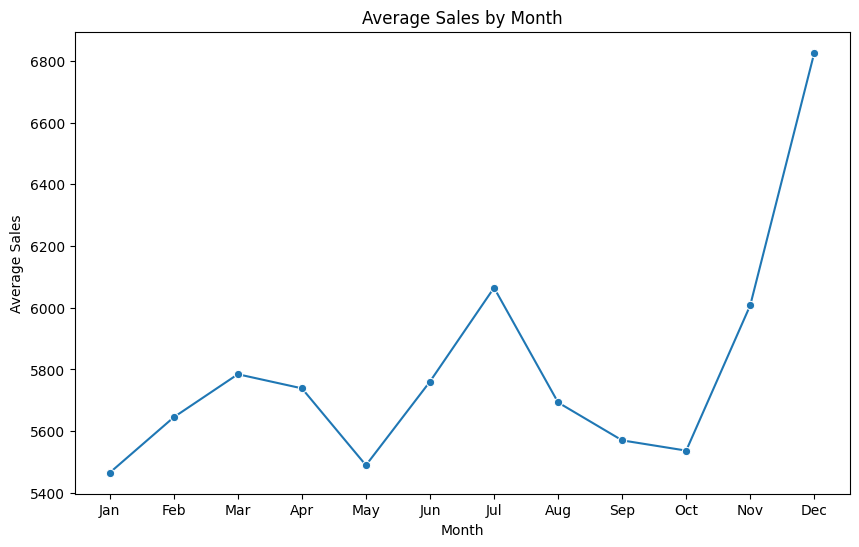

In [37]:
# For simplicity, let's assume you have a 'Month' column derived from the 'Date'
# You would need to create it if it doesn't exist, to analyze seasonal effects

train_store_merged_df['Date'] = pd.to_datetime(train_store_merged_df['Date'])
train_store_merged_df['Month'] = train_store_merged_df['Date'].dt.month

# Average sales by month
monthly_sales = train_store_merged_df.groupby('Month')['Sales'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(x='Month', y='Sales', data=monthly_sales, marker='o')
plt.title('Average Sales by Month')
plt.xlabel('Month')
plt.ylabel('Average Sales')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

# Sales by Store Type and Assortment

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


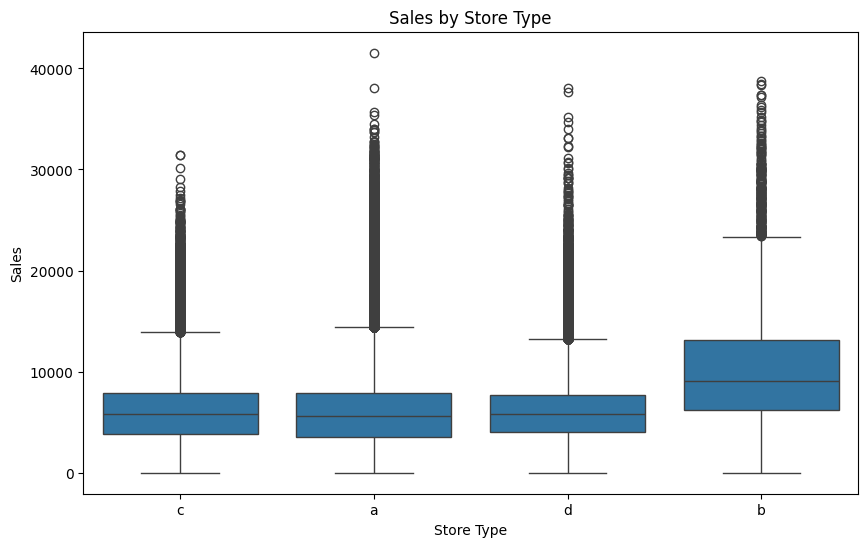

In [38]:
# Sales by Store Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='StoreType', y='Sales', data=train_store_merged_df)
plt.title('Sales by Store Type')
plt.xlabel('Store Type')
plt.ylabel('Sales')
plt.show()


c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


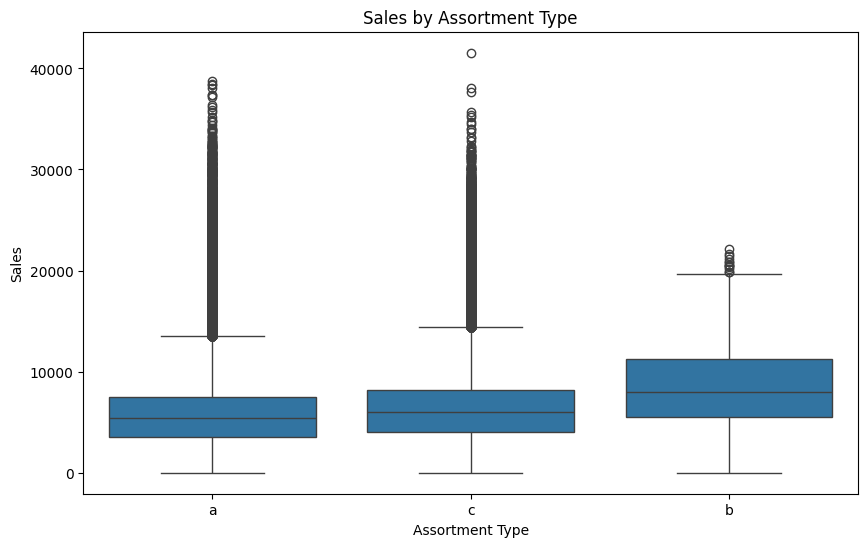

In [39]:
# Sales by Assortment Type
plt.figure(figsize=(10, 6))
sns.boxplot(x='Assortment', y='Sales', data=train_store_merged_df)
plt.title('Sales by Assortment Type')
plt.xlabel('Assortment Type')
plt.ylabel('Sales')
plt.show()


#  Impact of Competition Distance on Sales

c:\Users\admin\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


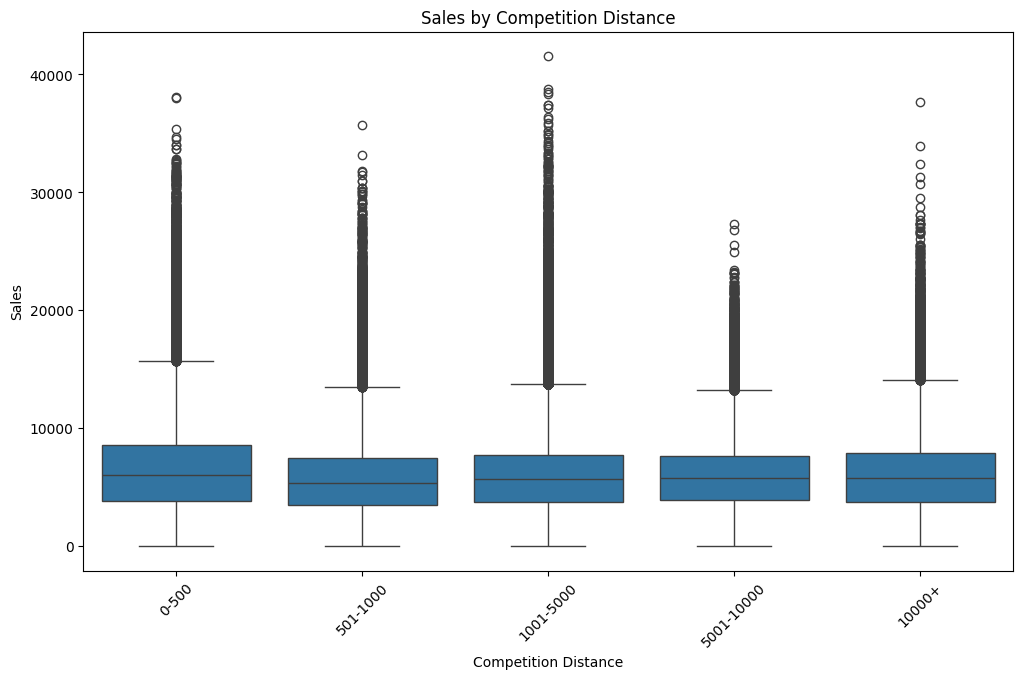

In [40]:
# Categorizing competition distance into bins for easier analysis
train_store_merged_df['CompetitionDistanceBin'] = pd.cut(train_store_merged_df['CompetitionDistance'], bins=[0, 500, 1000, 5000, 10000, np.inf], labels=['0-500', '501-1000', '1001-5000', '5001-10000', '10000+'])

plt.figure(figsize=(12, 7))
sns.boxplot(x='CompetitionDistanceBin', y='Sales', data=train_store_merged_df)
plt.title('Sales by Competition Distance')
plt.xlabel('Competition Distance')
plt.ylabel('Sales')
plt.xticks(rotation=45)
plt.show()


In [41]:
# Compare sales behavior before, during, and after holidays
logger.info('Comparing sales behavior around holidays.')
# This would involve creating subsets of data around holidays and plotting sales

# Seasonal purchase behaviors
logger.info('Analyzing seasonal purchase behaviors.')
# This would require identifying significant dates and comparing sales data

# Correlation between sales and number of customers
logger.info('Exploring the correlation between sales and number of customers.')
# This would likely involve a scatter plot and calculation of a correlation coefficient

# Effect of promo on sales
logger.info('Analyzing the effect of promotions on sales and customer attraction.')
# Analyzing sales with and without promo

# Customer behavior during store open and closing times
logger.info('Studying trends of customer behavior during store opening times.')
# This might involve comparing sales at different times of the day

# Stores opened on all weekdays and their effect on weekend sales
logger.info('Identifying stores opened throughout the week and their impact on weekend sales.')
# Subset data for stores open all week and compare their weekend sales

# Assortment type and sales
logger.info('Analyzing how assortment types affect sales.')
# Visualization of sales by assortment type

# Effect of distance to next competitor on sales
logger.info('Studying the impact of competitor distance on sales.')
# This could involve grouping stores by distance brackets and comparing sales

# Opening or reopening of new competitors
logger.info('Evaluating the effect of new competitors on existing stores.')
# Identifying stores with changes in competitor distance and analyzing sales trends

# It's important to replace these comments with actual analysis code and visualizations
# as they are placeholders for your exploratory analysis steps.

2024-04-02 22:26:51,600 - INFO - Comparing sales behavior around holidays.
2024-04-02 22:26:51,600 - INFO - Analyzing seasonal purchase behaviors.
2024-04-02 22:26:51,609 - INFO - Exploring the correlation between sales and number of customers.
2024-04-02 22:26:51,609 - INFO - Analyzing the effect of promotions on sales and customer attraction.
2024-04-02 22:26:51,609 - INFO - Studying trends of customer behavior during store opening times.
2024-04-02 22:26:51,617 - INFO - Identifying stores opened throughout the week and their impact on weekend sales.
2024-04-02 22:26:51,617 - INFO - Analyzing how assortment types affect sales.
2024-04-02 22:26:51,617 - INFO - Studying the impact of competitor distance on sales.
2024-04-02 22:26:51,617 - INFO - Evaluating the effect of new competitors on existing stores.


In [42]:
logger.debug('this is debug')

2024-04-02 22:26:51,632 - DEBUG - this is debug


In [43]:
logger.info('EDA process completed')

2024-04-02 22:26:51,660 - INFO - EDA process completed


In [44]:
logger.warning('this is warning')

2024-04-02 22:26:51,677 - WARNING - this is warning


In [45]:
logger.error("This is error")

2024-04-02 22:26:51,706 - ERROR - This is error


In [46]:
logger.critical('this is critical')

2024-04-02 22:26:51,725 - CRITICAL - this is critical
